# 第一章　WEBからの注文数を分析する

## 1.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
customer_master = pd.read_csv('Data100/1_data/customer_master.csv')
customer_master.head()

,customer_id,customer_name,registration_date,customer_name_kana,email,gender,age,birth,pref
0,IK152942,平田 裕次郎,2019-01-01 00:25:33,ひらた ゆうじろう,hirata_yuujirou@example.com,M,29,1990/6/10,石川県
1,TS808488,田村 詩織,2019-01-01 01:13:45,たむら しおり,tamura_shiori@example.com,F,33,1986/5/20,東京都
2,AS834628,久野 由樹,2019-01-01 02:00:14,ひさの ゆき,hisano_yuki@example.com,F,63,1956/1/2,茨城県
3,AS345469,鶴岡 薫,2019-01-01 04:48:22,つるおか かおる,tsuruoka_kaoru@example.com,M,74,1945/3/25,東京都
4,GD892565,大内 高史,2019-01-01 04:54:51,おおうち たかし,oouchi_takashi@example.com,M,54,1965/8/5,千葉県


In [3]:
customer_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 9 columns):
customer_id           5000 non-null object
customer_name         5000 non-null object
registration_date     5000 non-null object
customer_name_kana    5000 non-null object
email                 5000 non-null object
gender                5000 non-null object
age                   5000 non-null int64
birth                 5000 non-null object
pref                  5000 non-null object
dtypes: int64(1), object(8)
memory usage: 351.7+ KB


In [4]:
item_master = pd.read_csv('Data100/1_data/item_master.csv')
item_master.head()

,item_id,item_name,item_price
0,S001,PC-A,50000
1,S002,PC-B,85000
2,S003,PC-C,120000
3,S004,PC-D,180000
4,S005,PC-E,210000


In [5]:
item_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
item_id       5 non-null object
item_name     5 non-null object
item_price    5 non-null int64
dtypes: int64(1), object(2)
memory usage: 248.0+ bytes


In [6]:
transaction_1 = pd.read_csv('Data100/1_data/transaction_1.csv')
transaction_1.head()

,transaction_id,price,payment_date,customer_id
0,T0000000113,210000,2019-02-01 01:36:57,PL563502
1,T0000000114,50000,2019-02-01 01:37:23,HD678019
2,T0000000115,120000,2019-02-01 02:34:19,HD298120
3,T0000000116,210000,2019-02-01 02:47:23,IK452215
4,T0000000117,170000,2019-02-01 04:33:46,PL542865


In [7]:
transaction_2 = pd.read_csv('Data100/1_data/transaction_2.csv')
transaction_2.head()

,transaction_id,price,payment_date,customer_id
0,T0000005113,295000,2019-06-15 07:20:27,TS169261
1,T0000005114,50000,2019-06-15 07:35:47,HI599892
2,T0000005115,85000,2019-06-15 07:56:36,HI421757
3,T0000005116,50000,2019-06-15 08:40:55,OA386378
4,T0000005117,120000,2019-06-15 08:44:23,TS506913


In [8]:
transaction_detail_1 = pd.read_csv('Data100/1_data/transaction_detail_1.csv')
transaction_detail_1.head()

,detail_id,transaction_id,item_id,quantity
0,0,T0000000113,S005,1
1,1,T0000000114,S001,1
2,2,T0000000115,S003,1
3,3,T0000000116,S005,1
4,4,T0000000117,S002,2


In [9]:
transaction_detail_2 = pd.read_csv('Data100/1_data/transaction_detail_2.csv')
transaction_detail_2.head()

,detail_id,transaction_id,item_id,quantity
0,5000,T0000004870,S002,3
1,5001,T0000004871,S003,1
2,5002,T0000004872,S001,2
3,5003,T0000004873,S004,1
4,5004,T0000004874,S003,2


In [10]:
transaction = pd.concat([transaction_1, transaction_2], axis = 0)
transaction.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6786 entries, 0 to 1785
Data columns (total 4 columns):
transaction_id    6786 non-null object
price             6786 non-null int64
payment_date      6786 non-null object
customer_id       6786 non-null object
dtypes: int64(1), object(3)
memory usage: 265.1+ KB


In [11]:
transaction_detail = pd.concat([transaction_detail_1, transaction_detail_2], axis = 0)
transaction_detail.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7144 entries, 0 to 2143
Data columns (total 4 columns):
detail_id         7144 non-null int64
transaction_id    7144 non-null object
item_id           7144 non-null object
quantity          7144 non-null int64
dtypes: int64(2), object(2)
memory usage: 279.1+ KB


In [12]:
join_data = transaction_detail.merge(transaction.drop('price', axis=1), on='transaction_id', how='left')
join_data.head()

,detail_id,transaction_id,item_id,quantity,payment_date,customer_id
0,0,T0000000113,S005,1,2019-02-01 01:36:57,PL563502
1,1,T0000000114,S001,1,2019-02-01 01:37:23,HD678019
2,2,T0000000115,S003,1,2019-02-01 02:34:19,HD298120
3,3,T0000000116,S005,1,2019-02-01 02:47:23,IK452215
4,4,T0000000117,S002,2,2019-02-01 04:33:46,PL542865


In [13]:
join_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7144 entries, 0 to 7143
Data columns (total 6 columns):
detail_id         7144 non-null int64
transaction_id    7144 non-null object
item_id           7144 non-null object
quantity          7144 non-null int64
payment_date      7144 non-null object
customer_id       7144 non-null object
dtypes: int64(2), object(4)
memory usage: 390.7+ KB


In [14]:
join_data = join_data.merge(customer_master, on='customer_id', how='left')
join_data.head(3)

,detail_id,transaction_id,item_id,quantity,payment_date,customer_id,customer_name,registration_date,customer_name_kana,email,gender,age,birth,pref
0,0,T0000000113,S005,1,2019-02-01 01:36:57,PL563502,井本 芳正,2019-01-07 14:34:35,いもと よしまさ,imoto_yoshimasa@example.com,M,30,1989/7/15,熊本県
1,1,T0000000114,S001,1,2019-02-01 01:37:23,HD678019,三船 六郎,2019-01-27 18:00:11,みふね ろくろう,mifune_rokurou@example.com,M,73,1945/11/29,京都府
2,2,T0000000115,S003,1,2019-02-01 02:34:19,HD298120,山根 小雁,2019-01-11 08:16:02,やまね こがん,yamane_kogan@example.com,M,42,1977/5/17,茨城県


In [15]:
join_data = join_data.merge(item_master, on='item_id', how='left')
join_data.head(3)

,detail_id,transaction_id,item_id,quantity,payment_date,customer_id,customer_name,registration_date,customer_name_kana,email,gender,age,birth,pref,item_name,item_price
0,0,T0000000113,S005,1,2019-02-01 01:36:57,PL563502,井本 芳正,2019-01-07 14:34:35,いもと よしまさ,imoto_yoshimasa@example.com,M,30,1989/7/15,熊本県,PC-E,210000
1,1,T0000000114,S001,1,2019-02-01 01:37:23,HD678019,三船 六郎,2019-01-27 18:00:11,みふね ろくろう,mifune_rokurou@example.com,M,73,1945/11/29,京都府,PC-A,50000
2,2,T0000000115,S003,1,2019-02-01 02:34:19,HD298120,山根 小雁,2019-01-11 08:16:02,やまね こがん,yamane_kogan@example.com,M,42,1977/5/17,茨城県,PC-C,120000


In [16]:
join_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7144 entries, 0 to 7143
Data columns (total 16 columns):
detail_id             7144 non-null int64
transaction_id        7144 non-null object
item_id               7144 non-null object
quantity              7144 non-null int64
payment_date          7144 non-null object
customer_id           7144 non-null object
customer_name         7144 non-null object
registration_date     7144 non-null object
customer_name_kana    7144 non-null object
email                 7144 non-null object
gender                7144 non-null object
age                   7144 non-null int64
birth                 7144 non-null object
pref                  7144 non-null object
item_name             7144 non-null object
item_price            7144 non-null int64
dtypes: int64(4), object(12)
memory usage: 948.8+ KB


In [17]:
join_data['price'] = join_data['quantity'] * join_data['item_price']
join_data.head()

,detail_id,transaction_id,item_id,quantity,payment_date,customer_id,customer_name,registration_date,customer_name_kana,email,gender,age,birth,pref,item_name,item_price,price
0,0,T0000000113,S005,1,2019-02-01 01:36:57,PL563502,井本 芳正,2019-01-07 14:34:35,いもと よしまさ,imoto_yoshimasa@example.com,M,30,1989/7/15,熊本県,PC-E,210000,210000
1,1,T0000000114,S001,1,2019-02-01 01:37:23,HD678019,三船 六郎,2019-01-27 18:00:11,みふね ろくろう,mifune_rokurou@example.com,M,73,1945/11/29,京都府,PC-A,50000,50000
2,2,T0000000115,S003,1,2019-02-01 02:34:19,HD298120,山根 小雁,2019-01-11 08:16:02,やまね こがん,yamane_kogan@example.com,M,42,1977/5/17,茨城県,PC-C,120000,120000
3,3,T0000000116,S005,1,2019-02-01 02:47:23,IK452215,池田 菜摘,2019-01-10 05:07:38,いけだ なつみ,ikeda_natsumi@example.com,F,47,1972/3/17,兵庫県,PC-E,210000,210000
4,4,T0000000117,S002,2,2019-02-01 04:33:46,PL542865,栗田 憲一,2019-01-25 06:46:05,くりた けんいち,kurita_kenichi@example.com,M,74,1944/12/17,長崎県,PC-B,85000,170000


In [18]:
join_data['price'].sum() == transaction['price'].sum()

True

In [19]:
join_data.describe()

,detail_id,quantity,age,item_price,price
count,7144.000000,7144.000000,7144.000000,7144.000000,7144.000000
mean,3571.500000,1.199888,50.265677,121698.628219,135937.150056
std,2062.439494,0.513647,17.190314,64571.311830,68511.453297
min,0.000000,1.000000,20.000000,50000.000000,50000.000000
25%,1785.750000,1.000000,36.000000,50000.000000,85000.000000
50%,3571.500000,1.000000,50.000000,102500.000000,120000.000000
75%,5357.250000,1.000000,65.000000,187500.000000,210000.000000
max,7143.000000,4.000000,80.000000,210000.000000,420000.000000


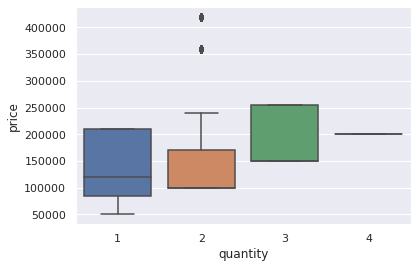

In [20]:
sns.set()
sns.boxplot(x='quantity', y='price', data=join_data)

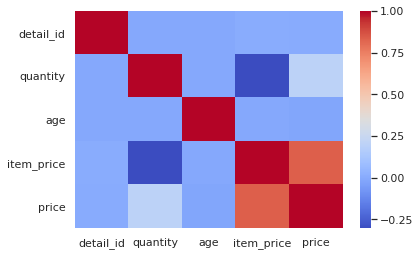

In [21]:
sns.heatmap(join_data.corr(), cmap='coolwarm')

In [22]:
join_data.dtypes

detail_id              int64
transaction_id        object
item_id               object
quantity               int64
payment_date          object
customer_id           object
customer_name         object
registration_date     object
customer_name_kana    object
email                 object
gender                object
age                    int64
birth                 object
pref                  object
item_name             object
item_price             int64
price                  int64
dtype: object

In [27]:
join_data['payment_date'] = pd.to_datetime(join_data['payment_date'])
join_data['payment_month'] = join_data['payment_date'].dt.strftime('%Y%m')

In [28]:
join_data.head(3)

,detail_id,transaction_id,item_id,quantity,payment_date,customer_id,customer_name,registration_date,customer_name_kana,email,gender,age,birth,pref,item_name,item_price,price,payment_month
0,0,T0000000113,S005,1,2019-02-01 01:36:57,PL563502,井本 芳正,2019-01-07 14:34:35,いもと よしまさ,imoto_yoshimasa@example.com,M,30,1989/7/15,熊本県,PC-E,210000,210000,201902
1,1,T0000000114,S001,1,2019-02-01 01:37:23,HD678019,三船 六郎,2019-01-27 18:00:11,みふね ろくろう,mifune_rokurou@example.com,M,73,1945/11/29,京都府,PC-A,50000,50000,201902
2,2,T0000000115,S003,1,2019-02-01 02:34:19,HD298120,山根 小雁,2019-01-11 08:16:02,やまね こがん,yamane_kogan@example.com,M,42,1977/5/17,茨城県,PC-C,120000,120000,201902


In [31]:
join_data.groupby('payment_month').sum()

,detail_id,quantity,age,item_price,price
payment_month,,,,,
201902,676866,1403,59279,142805000,160185000
201903,2071474,1427,58996,142980000,160370000
201904,3476816,1421,59246,143670000,160510000
201905,4812795,1390,58195,139655000,155420000
201906,6369999,1446,61070,147090000,164030000
201907,8106846,1485,62312,153215000,170620000


In [32]:
join_data.groupby(['payment_month', 'item_name']).sum()[['price', 'quantity']]

price  quantity
payment_month item_name                    
201902        PC-A       24150000       483
              PC-B       25245000       297
              PC-C       19800000       165
              PC-D       31140000       173
              PC-E       59850000       285
201903        PC-A       26000000       520
              PC-B       25500000       300
              PC-C       19080000       159
              PC-D       25740000       143
              PC-E       64050000       305
201904        PC-A       25900000       518
              PC-B       23460000       276
              PC-C       21960000       183
              PC-D       24300000       135
              PC-E       64890000       309
201905        PC-A       24850000       497
              PC-B       25330000       298
              PC-C       20520000       171
              PC-D       25920000       144
              PC-E       58800000       280
201906        PC-A       26000000       520
              PC-B       23970000       282
              PC-C       21840000       182
              PC-D       28800000       160
              PC-E       63420000       302
201907        PC-A       25250000       505
              PC-B       28220000       332
              PC-C       19440000       162
              PC-D       26100000       145
              PC-E       71610000       341

In [33]:
graph_data = pd.pivot_table(join_data, index='payment_month', columns='item_name', values='price', aggfunc='sum')
graph_data.head()

item_name,PC-A,PC-B,PC-C,PC-D,PC-E
payment_month,,,,,
201902,24150000,25245000,19800000,31140000,59850000
201903,26000000,25500000,19080000,25740000,64050000
201904,25900000,23460000,21960000,24300000,64890000
201905,24850000,25330000,20520000,25920000,58800000
201906,26000000,23970000,21840000,28800000,63420000


No handles with labels found to put in legend.


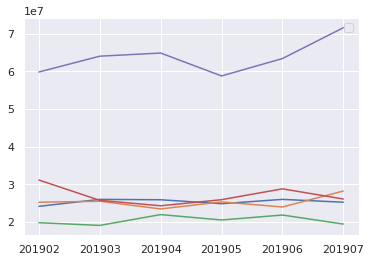

In [37]:
plt.plot(graph_data)
plt.legend()

In [62]:
pip install matplotlib==3.1.0

     |████████████████████████████████| 13.1 MB 1.7 MB/s eta 0:00:01     |███████████████████████████▋    | 11.3 MB 1.1 MB/s eta 0:00:02
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.1.1
    Uninstalling matplotlib-3.1.1:
      Successfully uninstalled matplotlib-3.1.1
Note: you may need to restart the kernel to use updated packages.
